In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import rasterio
import os
from torchvision import transforms
import torch
import torch.nn.functional as F
from torchvision.utils import save_image
from rasterio import open as rstopen

In [2]:
def read_method(method:str=''):
    if method == 'Image' or method == '':
        return Image.open
    if method == 'rasterio':
        return rasterio.open
    if method == 'numpy':
        return np.load


def image_normalize(im, axis = (0,1), c = 1e-8):
    return (im - im.mean(axis)) / (im.std(axis) + c)

In [3]:
data_dir = "/home/winter/code-resource/treeseg/trainingdata"

pan: 0.0,597.0
ndvi: -0.5921052694320679,0.7050691246986389
[0 1]
[0 1]
-----------------------
(812, 1349)


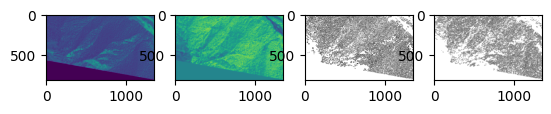

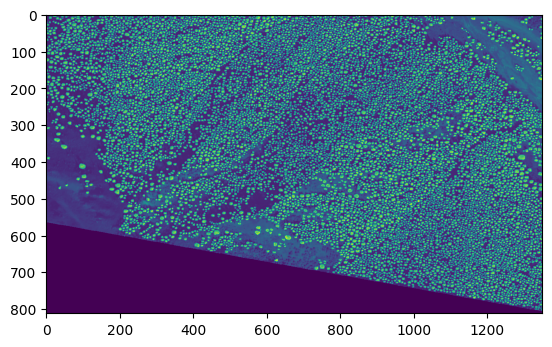

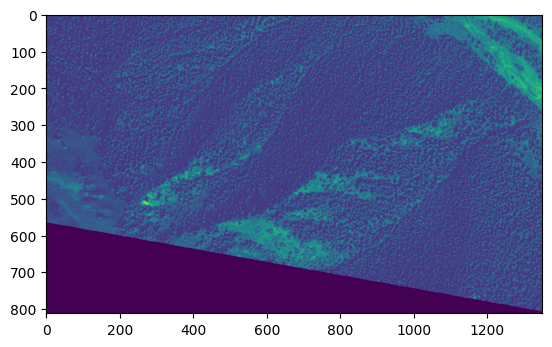

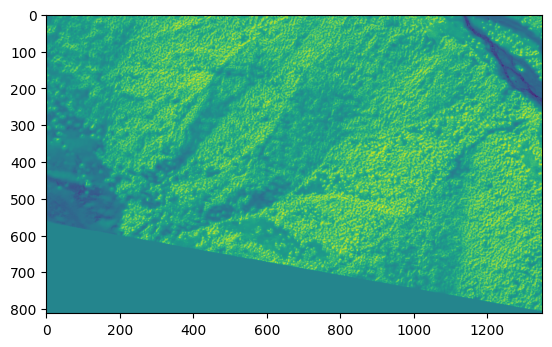

------------------norm2------------------
tensor(0.)
tensor(0.9707)
------------------norm3------------------
-1.6467391
6.236871
------------------norm4------------------
tensor(-1.6467)
tensor(6.2369)


In [14]:
# check interm png
interm_png = 'interm_png'
v = 1
a = 3
pattern = '{}-{}-area{}.png'
pan = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('pan',v,a)}").read(1)
ndvi = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('ndvi',v,a)}").read(1)
invalid_min = np.min(ndvi)
ndvi[ndvi==invalid_min] = 0
anno = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('annotation',v,a)}").read(1)
boundary = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('boundary',v,a)}").read(1)

print(f'pan: {np.min(pan)},{np.max(pan)}')
print(f'ndvi: {np.min(ndvi)},{np.max(ndvi)}')
print(np.unique(anno))
print(np.unique(boundary))

print('-----------------------')
print(pan.shape)

fig = plt.figure()
fig.add_subplot(1,4,1)
plt.imshow(pan)
fig.add_subplot(1,4,2)
plt.imshow(ndvi)
fig.add_subplot(1,4,3)
plt.imshow(anno,cmap='binary')
fig.add_subplot(1,4,4)
plt.imshow(boundary,cmap='binary')
plt.show()

fig2 = plt.figure()
max_v = np.max(pan)
plt.imshow(pan+anno*max_v)
plt.show()

fig3 = plt.figure()
plt.imshow(pan)
plt.show()

fig4 = plt.figure()
plt.imshow(ndvi)
plt.show()

panT = torch.as_tensor(pan,dtype=torch.float32).unsqueeze(0)
norm2 = F.normalize(panT, 0, 1)
print('------------------norm2------------------')
print(torch.min(norm2))
print(torch.max(norm2))
# print(norm2)

norm3 = image_normalize(pan)
print('------------------norm3------------------')
print(np.min(norm3))
print(np.max(norm3))
# print(norm3)

std,mean = torch.std_mean(panT)
trans = transforms.Normalize(mean,std)
norm4 = trans(panT)
print('------------------norm4------------------')
print(torch.min(norm4))
print(torch.max(norm4))

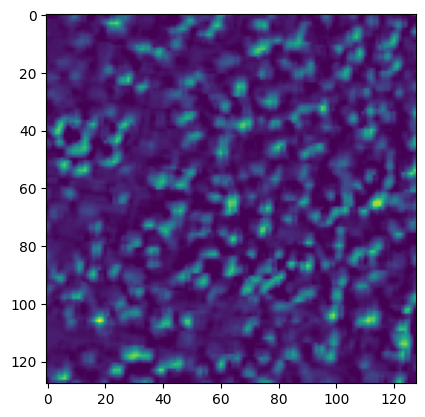

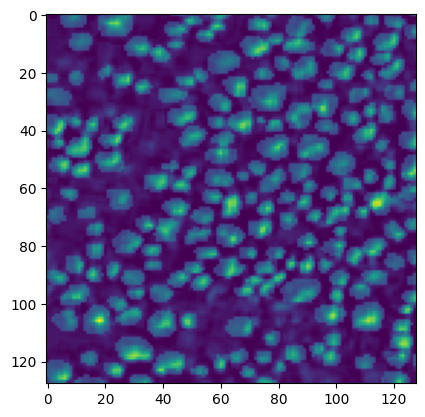

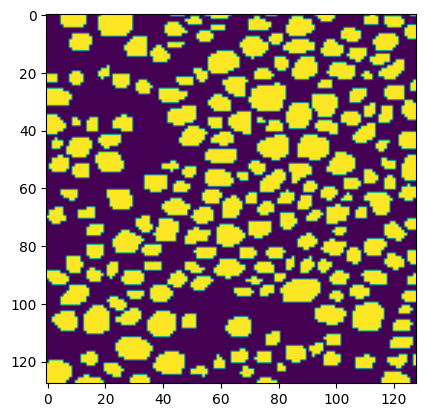

In [18]:
pan1 = pan[0:128,0:128]
ndvi1 = ndvi[0:128,0:128]
anno1 = anno[0:128,0:128]

plt.imshow(pan1)
plt.show()
plt.imshow(pan1)
plt.show()
plt.imshow(pan1+50*anno1)
plt.show()
plt.imshow(anno1)
plt.show()

In [5]:
# all-view min-max & normalize
full_pan = rstopen(f'{data_dir}/tif/pan-0.tif').read(1)

RasterioIOError: /home/winter/code-resource/treeseg/trainingdata/tif/pan-0.tif: No such file or directory

In [ ]:
partial_pan = full_pan[20000:22000,20000:22000]

In [ ]:
print(f'min max: {np.min(partial_pan)},{np.max(partial_pan)}')
h,w = full_pan.shape
print(f'zeros: {np.sum(full_pan==0)/(h*w)}')
hist, bins = np.histogram(partial_pan, bins=100)
plt.hist(hist, bins)
plt.show()

In [ ]:
print(hist)
print(bins)